In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def type_info(obj):
    print(type(obj))
    for type_ in (Preprocessor, FeatureScaler, MinMaxScaler):
        print(type_, isinstance(obj, type_))
    print(obj)

In [ ]:
class Preprocessor:
    
    def __init__(self):
        pass
    
    def forward(self):
        print('forward')
        
    def __repr__(self):
        return 'Preprocessor()'

In [ ]:
pre = Preprocessor()
pre.forward()

forward


In [ ]:
type_info(pre)

<class '__main__.Preprocessor'>
<class '__main__.Preprocessor'> True
<class '__main__.FeatureScaler'> False
<class '__main__.MinMaxScaler'> False
Preprocessor()


In [ ]:
class FeatureScaler(Preprocessor):
    
    def __init__(self, x):
        super().__init__()
        self.x = x
        self.processed = False
        
    def process(self):
        print('processing')
        self.processed = True
        
    @classmethod
    def from_list(cls, *args):
        return cls(*args)

In [ ]:
scaler = FeatureScaler([1, 2, 3])
scaler.forward()
scaler.process()

forward
processing


In [ ]:
type_info(scaler)

<class '__main__.FeatureScaler'>
<class '__main__.Preprocessor'> True
<class '__main__.FeatureScaler'> True
<class '__main__.MinMaxScaler'> False
Preprocessor()


In [ ]:
scaler2 = FeatureScaler.from_list([1, 2])
scaler2.x

[1, 2]

In [ ]:
class MinMaxScaler(FeatureScaler):
    
    def __init__(self, x, y):
        super().__init__(x)
        self.y = y
        
    def scale(self):
        return [arg/2 for arg in self.x]

In [ ]:
minmax = MinMaxScaler([1, 2, 3], 4)
minmax.forward()
minmax.process()
print(minmax.scale())

forward
processing
[0.5, 1.0, 1.5]


In [ ]:
type_info(minmax)

<class '__main__.MinMaxScaler'>
<class '__main__.Preprocessor'> True
<class '__main__.FeatureScaler'> True
<class '__main__.MinMaxScaler'> True
Preprocessor()


In [ ]:
minmax2 = MinMaxScaler.from_list(*[7, 8])
minmax2.x, minmax2.y

(7, 8)

In [ ]:
class StandardScaler(FeatureScaler):
    
    def __init__(self, x, y, z):
        super().__init__(x)
        self.y = y
        self.z = z
        
    def backward(self):
        return self.z, self.y, self.x

In [ ]:
ss = StandardScaler(11, 22, 33)
ss.forward()
print(ss.backward())

forward
(33, 22, 11)


In [ ]:
ss2 = StandardScaler.from_list(*[7, 9, 11])
ss2.forward()
print(ss2.backward())

forward
(11, 9, 7)


In [ ]:
type_info(ss2)

<class '__main__.StandardScaler'>
<class '__main__.Preprocessor'> True
<class '__main__.FeatureScaler'> True
<class '__main__.MinMaxScaler'> False
Preprocessor()


In [ ]:
class TmpModule(nn.Module):
    
    def __init__(self, init_args):
        super().__init__()
        init_args.pop('self', None)
        init_args.pop('__class__', None)
        self.init_args = init_args
        
    def get_args(self):
        print('init args:', self.init_args)
    
    @classmethod
    def from_list(cls, arr):
        return cls(*arr)

In [ ]:
class ImgModel(TmpModule):
    
    def __init__(self, dim, hidden, bn):
        super().__init__(locals())
        self.dim = dim
        self.hidden = hidden
        self.bn = bn
        
    def forward(self, x):
        return 2 * x

In [ ]:
img = ImgModel(12, 4, True)
img.__dict__

{'_backend': <torch.nn.backends.thnn.THNNFunctionBackend at 0x118f9a320>,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict(),
 'training': True,
 'init_args': {'dim': 12, 'hidden': 4, 'bn': True},
 'dim': 12,
 'hidden': 4,
 'bn': True}

In [ ]:
img2 = ImgModel.from_list([3, 6, False])
img2.__dict__

{'_backend': <torch.nn.backends.thnn.THNNFunctionBackend at 0x118f9a320>,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict(),
 'training': True,
 'init_args': {'dim': 3, 'hidden': 6, 'bn': False},
 'dim': 3,
 'hidden': 6,
 'bn': False}

In [ ]:
img2.get_args()

init args: {'dim': 3, 'hidden': 6, 'bn': False}


## Testing changing BaseModel to mixin (called ModelMixin). Ended up switching back bc regular inheritance works after all (not sure what caused prev issue, where from_path method received cls basemodel instead of child model)

In [ ]:
import torch
import torch.nn as nn
from htools.ml import ModelMixin

## super init version 1: probably more confusing, use version 2 below 
-nn.Module comes first here  
-still a bit confused about exactly how order and init statements work

In [ ]:
class Net(nn.Module, ModelMixin):
    
    def __init__(self, x_dim):
        super().__init__()
        ModelMixin.__init__(self, locals())

        self.fc = nn.Linear(x_dim, 1)
        self.act = nn.Sigmoid()
        
    def forward(self, x):
        return self.act(self.fc(x))

In [ ]:
x = torch.randint(6, (4, 3), dtype=torch.float)
x

tensor([[0., 3., 0.],
        [4., 5., 4.],
        [4., 1., 0.],
        [1., 2., 3.]])

In [ ]:
net = Net(3)
net

Net(
  (fc): Linear(in_features=3, out_features=1, bias=True)
  (act): Sigmoid()
)

In [ ]:
net(x)

tensor([[0.2570],
        [0.8122],
        [0.8215],
        [0.5569]], grad_fn=<SigmoidBackward>)

In [ ]:
net.dims()

[(1, 3), (1,)]

In [ ]:
net.trainable()

[((1, 3), True), ((1,), True)]

In [ ]:
net.weight_stats()

[(0.178, 0.373), (-0.471, nan)]

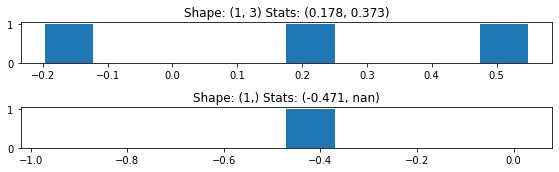

In [ ]:
net.plot_weights()

In [ ]:
net.save(12, '../data')

Weights saved from epoch 12.


In [ ]:
net2 = Net.from_path('../data/model_12.pth')

Epoch 12 weights loaded from ../data/model_12.pth.
Model parameters: {'x_dim': 3}
Currently in eval mode.


In [ ]:
net2

Net(
  (fc): Linear(in_features=3, out_features=1, bias=True)
  (act): Sigmoid()
)

In [ ]:
net2(x)

tensor([[0.2570],
        [0.8122],
        [0.8215],
        [0.5569]], grad_fn=<SigmoidBackward>)

## Version 2 - simpler way to super init  
-ModelMixin must come before nn.Module  
-locals() must be passed to super init so mixin can store args

In [ ]:
class NetB(ModelMixin, nn.Module):
    
    def __init__(self, x_dim):
        super().__init__(locals())

        self.fc = nn.Linear(x_dim, 1)
        self.act = nn.Sigmoid()
        
    def forward(self, x):
        return self.act(self.fc(x))

In [ ]:
netb = NetB(3)
netb

NetB(
  (fc): Linear(in_features=3, out_features=1, bias=True)
  (act): Sigmoid()
)

In [ ]:
netb(x)

tensor([[0.4054],
        [0.1432],
        [0.1389],
        [0.4869]], grad_fn=<SigmoidBackward>)

In [ ]:
netb.trainable()

[((1, 3), True), ((1,), True)]

In [ ]:
netb.dims()

[(1, 3), (1,)]

In [ ]:
netb.save(4, '../data')

Weights saved from epoch 4.


In [ ]:
netb2 = NetB.from_path('../data/model_4.pth')
netb2

Epoch 4 weights loaded from ../data/model_4.pth.
Model parameters: {'x_dim': 3}
Currently in eval mode.


NetB(
  (fc): Linear(in_features=3, out_features=1, bias=True)
  (act): Sigmoid()
)

In [ ]:
netb2(x)

tensor([[0.4054],
        [0.1432],
        [0.1389],
        [0.4869]], grad_fn=<SigmoidBackward>)

In [ ]:
data = torch.load('../data/model_4.pth')
data.keys()

dict_keys(['weights', 'epoch', 'params'])

## Testing inheritance again (non mixin)

In [ ]:
import os
import torch
import torch.nn as nn

from ml_htools.torch_utils import BaseModel

In [ ]:
class SubModel(BaseModel):
    
    def __init__(self, dim, norm):
        super().__init__(locals())
        layers = [nn.Linear(dim, 1)]
        if norm:
            layers.append(nn.BatchNorm1d(1))
        layers.append(nn.Sigmoid())
        
        self.layers = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.layers(x)

In [ ]:
x = torch.randint(6, (3, 5), dtype=torch.float)
x

tensor([[5., 3., 1., 3., 4.],
        [5., 2., 5., 1., 1.],
        [0., 1., 2., 0., 1.]])

In [ ]:
m = SubModel(5, True)
m

SubModel(
  (layers): Sequential(
    (0): Linear(in_features=5, out_features=1, bias=True)
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Sigmoid()
  )
)

In [ ]:
m.weight_stats()

[(-0.017, 0.101), (-0.348, nan), (1.0, nan), (0.0, nan)]

In [ ]:
m(x)

tensor([[0.4756],
        [0.7806],
        [0.2366]], grad_fn=<SigmoidBackward>)

In [ ]:
m.save(1, '../data')

Epoch 1 weights saved to ../data/model_e1.pth.


In [ ]:
m.save(1, '../data')

FileExistsError: 

In [ ]:
penalty = m(x).std()
penalty.backward()

for p in m.parameters():
    print(p.data)
    p.data -= 5 * p.grad
    print(p.data, '\n')

tensor([[ 0.0804,  0.0819, -0.0600, -0.1556, -0.0313]])
tensor([[ 0.1015,  0.1286, -0.2173, -0.0664,  0.0962]]) 

tensor([-0.3481])
tensor([-0.3481]) 

tensor([1.])
tensor([-0.0752]) 

tensor([0.])
tensor([0.0381]) 



In [ ]:
m.weight_stats()

[(0.009, 0.148), (-0.348, nan), (-0.075, nan), (0.038, nan)]

In [ ]:
m(x)

tensor([[0.4830],
        [0.5242],
        [0.5213]], grad_fn=<SigmoidBackward>)

In [ ]:
m.weight_dir

'../data'

In [ ]:
m.save(2)

Epoch 2 weights saved to ../data/model_e2.pth.


In [ ]:
m1 = SubModel.from_path('../data/model_e1.pth')
m1.train()

Epoch 1 weights loaded from ../data/model_e1.pth.
Model parameters: {'dim': 5, 'norm': True}
Currently in eval mode.


SubModel(
  (layers): Sequential(
    (0): Linear(in_features=5, out_features=1, bias=True)
    (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Sigmoid()
  )
)

In [ ]:
m1(x)

tensor([[0.4756],
        [0.7806],
        [0.2366]], grad_fn=<SigmoidBackward>)

In [ ]:
m1.weight_stats()

[(-0.017, 0.101), (-0.348, nan), (1.0, nan), (0.0, nan)]

In [ ]:
m.load_epoch(2)

Epoch 2 weights loaded from ../data/model_e2.pth. 
Model parameters: {'dim': 5, 'norm': True}
Currently in train mode.


In [ ]:
m.weight_stats()

[(0.009, 0.148), (-0.348, nan), (-0.075, nan), (0.038, nan)]

In [ ]:
m(x)

tensor([[0.4830],
        [0.5242],
        [0.5213]], grad_fn=<SigmoidBackward>)

In [ ]:
m.load_epoch(1)
m.weight_stats()

Epoch 1 weights loaded from ../data/model_e1.pth. 
Model parameters: {'dim': 5, 'norm': True}
Currently in train mode.


[(-0.017, 0.101), (-0.348, nan), (1.0, nan), (0.0, nan)]

In [ ]:
m(x)

tensor([[0.4756],
        [0.7806],
        [0.2366]], grad_fn=<SigmoidBackward>)

## Scratch - load_epoch()

In [ ]:
import re

In [ ]:
num = 2
[file for file in os.listdir('../data') if file.endswith(f'_e{num}.pth')]

['model_e2.pth']

In [ ]:
list(filter(re.compile(f'.*_e{1}.pth').match, os.listdir('../data')))

['model_e1.pth']

In [ ]:
os.listdir('../data')

['lines5000.txt', 'model_e1.pth', 'model_e2.pth', 'lines100.txt']